### Business Objective:- To Predict Sample Collection Time that The sample has reached the Lab on time or not

### Business Constraint:- To collect the sample data that Varies with Different Features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel("Medical_data.xlsx")

In [3]:
data

,Patient_ID,Patient_Age,Patient_Gender,Test_Name,Sample,Way_Of_Storage_Of_Sample,Test_Booking_Date,Test_Booking_Time_HH_MM,Sample_Collection_Date,Scheduled_Sample_Collection_Time_HH_MM,...,Cut-off time_HH_MM,Agent_ID,Traffic_Conditions,Agent_Location_KM,Time_Taken_To_Reach_Patient_MM,Time_For_Sample_Collection_MM,Lab_Location_KM,Time_Taken_To_Reach_Lab_MM,Mode_Of_Transport,Reached_On_Time
0,1,34,Male,Acute kidney profile,Blood,Advanced,2022-02-15,12.40,2022-02-16,13.00,...,17.00,5,Low Traffic,7.0,14,10,13.0,26,BIKE,Y
1,3,25,Male,HbA1c,Blood,Normal,2022-02-17,11.12,2022-02-17,14.13,...,17.13,3,Low Traffic,12.0,24,10,6.0,12,BIKE,Y
2,4,29,Female,Vitamin D-25Hydroxy,Blood,Normal,2022-02-17,12.24,2022-02-17,16.10,...,19.10,4,Medium Traffic,2.0,6,3,3.0,9,BIKE,Y
3,5,28,Male,TSH,Blood,Normal,2022-02-17,13.38,2022-02-18,14.00,...,17.00,5,Low Traffic,5.0,10,10,5.0,10,BIKE,Y
4,6,32,Male,Lipid Profile,Blood,Normal,2022-02-17,16.10,2022-02-18,10.15,...,13.15,4,High Traffic,12.0,72,3,9.0,54,BIKE,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,747,30,Male,Vitamin D-25Hydroxy,Blood,Normal,2022-03-25,10.00,2022-03-26,12.00,...,15.00,3,High Traffic,9.0,36,3,38.9,195,BIKE,N
1015,795,18,Female,Vitamin D-25Hydroxy,Blood,Normal,2022-07-13,18.00,2022-07-14,9.00,...,12.00,43,High Traffic,5.0,20,9,35.4,177,BIKE,N
1016,894,18,Female,Vitamin D-25Hydroxy,Blood,Normal,2022-03-29,11.00,2022-03-29,13.00,...,16.00,7,Medium Traffic,3.0,7,11,59.7,178,BIKE,N
1017,906,37,Male,Vitamin D-25Hydroxy,Blood,Normal,2022-03-20,14.00,2022-03-20,16.00,...,19.00,9,Medium Traffic,5.0,12,10,63.0,173,BIKE,N


In [4]:
data["Test_Name"].value_counts()

Complete Urinalysis     133
CBC                     124
Acute kidney profile    110
Fasting blood sugar     110
RTPCR                   107
TSH                     106
Vitamin D-25Hydroxy      92
Lipid Profile            87
H1N1                     86
HbA1c                    64
Name: Test_Name, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Patient_ID                              1019 non-null   int64         
 1   Patient_Age                             1019 non-null   int64         
 2   Patient_Gender                          1019 non-null   object        
 3   Test_Name                               1019 non-null   object        
 4   Sample                                  1019 non-null   object        
 5   Way_Of_Storage_Of_Sample                1019 non-null   object        
 6   Test_Booking_Date                       1019 non-null   datetime64[ns]
 7   Test_Booking_Time_HH_MM                 1019 non-null   float64       
 8   Sample_Collection_Date                  1019 non-null   datetime64[ns]
 9   Scheduled_Sample_Collection_Time_HH_MM  1019 non-nul

In [6]:
data.describe()

,Patient_ID,Patient_Age,Test_Booking_Time_HH_MM,Scheduled_Sample_Collection_Time_HH_MM,Cut-off time_HH_MM,Agent_ID,Agent_Location_KM,Time_Taken_To_Reach_Patient_MM,Time_For_Sample_Collection_MM,Lab_Location_KM,Time_Taken_To_Reach_Lab_MM
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000
mean,510.000000,41.536801,13.786438,13.281178,16.211030,10.727184,11.151717,35.099117,8.768400,14.770265,54.207066
std,294.304264,14.250060,3.642197,3.272607,3.008199,10.551500,8.308835,38.364565,5.216279,12.951575,60.086703
min,1.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
25%,255.500000,31.000000,11.000000,11.000000,14.150000,4.000000,6.000000,15.000000,4.000000,7.000000,18.000000
50%,510.000000,40.000000,13.300000,13.000000,17.000000,7.000000,10.000000,26.000000,10.000000,10.800000,28.000000
75%,764.500000,50.000000,16.200000,16.000000,17.000000,14.000000,15.000000,41.500000,10.000000,16.000000,60.000000
max,1019.000000,91.000000,24.000000,23.000000,24.000000,49.000000,80.000000,420.000000,36.000000,81.000000,420.000000


In [7]:
data.head()

,Patient_ID,Patient_Age,Patient_Gender,Test_Name,Sample,Way_Of_Storage_Of_Sample,Test_Booking_Date,Test_Booking_Time_HH_MM,Sample_Collection_Date,Scheduled_Sample_Collection_Time_HH_MM,...,Cut-off time_HH_MM,Agent_ID,Traffic_Conditions,Agent_Location_KM,Time_Taken_To_Reach_Patient_MM,Time_For_Sample_Collection_MM,Lab_Location_KM,Time_Taken_To_Reach_Lab_MM,Mode_Of_Transport,Reached_On_Time
0,1,34,Male,Acute kidney profile,Blood,Advanced,2022-02-15,12.40,2022-02-16,13.00,...,17.00,5,Low Traffic,7.0,14,10,13.0,26,BIKE,Y
1,3,25,Male,HbA1c,Blood,Normal,2022-02-17,11.12,2022-02-17,14.13,...,17.13,3,Low Traffic,12.0,24,10,6.0,12,BIKE,Y
2,4,29,Female,Vitamin D-25Hydroxy,Blood,Normal,2022-02-17,12.24,2022-02-17,16.10,...,19.10,4,Medium Traffic,2.0,6,3,3.0,9,BIKE,Y
3,5,28,Male,TSH,Blood,Normal,2022-02-17,13.38,2022-02-18,14.00,...,17.00,5,Low Traffic,5.0,10,10,5.0,10,BIKE,Y
4,6,32,Male,Lipid Profile,Blood,Normal,2022-02-17,16.10,2022-02-18,10.15,...,13.15,4,High Traffic,12.0,72,3,9.0,54,BIKE,Y


In [8]:
data.columns

Index(['Patient_ID', 'Patient_Age', 'Patient_Gender', 'Test_Name', 'Sample',
       'Way_Of_Storage_Of_Sample', 'Test_Booking_Date',
       'Test_Booking_Time_HH_MM', 'Sample_Collection_Date',
       'Scheduled_Sample_Collection_Time_HH_MM', 'Cut-off Schedule',
       'Cut-off time_HH_MM', 'Agent_ID', 'Traffic_Conditions',
       'Agent_Location_KM', 'Time_Taken_To_Reach_Patient_MM',
       'Time_For_Sample_Collection_MM', 'Lab_Location_KM',
       'Time_Taken_To_Reach_Lab_MM', 'Mode_Of_Transport', 'Reached_On_Time'],
      dtype='object')

### because Patient_ID is nominal Data And Doesnt Provide any valueable information

In [9]:
data.drop(["Patient_ID"],axis=1,inplace=True)

In [10]:
data.head()

,Patient_Age,Patient_Gender,Test_Name,Sample,Way_Of_Storage_Of_Sample,Test_Booking_Date,Test_Booking_Time_HH_MM,Sample_Collection_Date,Scheduled_Sample_Collection_Time_HH_MM,Cut-off Schedule,Cut-off time_HH_MM,Agent_ID,Traffic_Conditions,Agent_Location_KM,Time_Taken_To_Reach_Patient_MM,Time_For_Sample_Collection_MM,Lab_Location_KM,Time_Taken_To_Reach_Lab_MM,Mode_Of_Transport,Reached_On_Time
0,34,Male,Acute kidney profile,Blood,Advanced,2022-02-15,12.40,2022-02-16,13.00,Sample by 5pm,17.00,5,Low Traffic,7.0,14,10,13.0,26,BIKE,Y
1,25,Male,HbA1c,Blood,Normal,2022-02-17,11.12,2022-02-17,14.13,Daily,17.13,3,Low Traffic,12.0,24,10,6.0,12,BIKE,Y
2,29,Female,Vitamin D-25Hydroxy,Blood,Normal,2022-02-17,12.24,2022-02-17,16.10,Daily,19.10,4,Medium Traffic,2.0,6,3,3.0,9,BIKE,Y
3,28,Male,TSH,Blood,Normal,2022-02-17,13.38,2022-02-18,14.00,Daily,17.00,5,Low Traffic,5.0,10,10,5.0,10,BIKE,Y
4,32,Male,Lipid Profile,Blood,Normal,2022-02-17,16.10,2022-02-18,10.15,Daily,13.15,4,High Traffic,12.0,72,3,9.0,54,BIKE,Y


In [11]:
data.isna().sum()

Patient_Age                               0
Patient_Gender                            0
Test_Name                                 0
Sample                                    0
Way_Of_Storage_Of_Sample                  0
Test_Booking_Date                         0
Test_Booking_Time_HH_MM                   0
Sample_Collection_Date                    0
Scheduled_Sample_Collection_Time_HH_MM    0
Cut-off Schedule                          0
Cut-off time_HH_MM                        0
Agent_ID                                  0
Traffic_Conditions                        0
Agent_Location_KM                         0
Time_Taken_To_Reach_Patient_MM            0
Time_For_Sample_Collection_MM             0
Lab_Location_KM                           0
Time_Taken_To_Reach_Lab_MM                0
Mode_Of_Transport                         0
Reached_On_Time                           0
dtype: int64

In [12]:
data.duplicated().sum()

31

In [13]:
data.drop_duplicates(keep="first",inplace=True)

In [14]:
data["Mode_Of_Transport"].value_counts()

BIKE    988
Name: Mode_Of_Transport, dtype: int64

In [15]:
data.drop(["Mode_Of_Transport"],axis=1,inplace=True)

In [16]:
data.columns

Index(['Patient_Age', 'Patient_Gender', 'Test_Name', 'Sample',
       'Way_Of_Storage_Of_Sample', 'Test_Booking_Date',
       'Test_Booking_Time_HH_MM', 'Sample_Collection_Date',
       'Scheduled_Sample_Collection_Time_HH_MM', 'Cut-off Schedule',
       'Cut-off time_HH_MM', 'Agent_ID', 'Traffic_Conditions',
       'Agent_Location_KM', 'Time_Taken_To_Reach_Patient_MM',
       'Time_For_Sample_Collection_MM', 'Lab_Location_KM',
       'Time_Taken_To_Reach_Lab_MM', 'Reached_On_Time'],
      dtype='object')

In [17]:
data.Traffic_Conditions.value_counts()

Medium Traffic    356
Low Traffic       320
High Traffic      312
Name: Traffic_Conditions, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
label=LabelEncoder()

In [20]:
data["Sample"]=data["Sample"].str.lower()

In [21]:
data.Sample.value_counts()

blood    673
swab     189
urine    126
Name: Sample, dtype: int64

In [22]:
Encode_Columns=["Traffic_Conditions","Patient_Gender","Sample","Test_Name","Way_Of_Storage_Of_Sample","Cut-off Schedule"]

In [23]:
for i in Encode_Columns:
    data[i]=label.fit_transform(data[i])

In [24]:
data

,Patient_Age,Patient_Gender,Test_Name,Sample,Way_Of_Storage_Of_Sample,Test_Booking_Date,Test_Booking_Time_HH_MM,Sample_Collection_Date,Scheduled_Sample_Collection_Time_HH_MM,Cut-off Schedule,Cut-off time_HH_MM,Agent_ID,Traffic_Conditions,Agent_Location_KM,Time_Taken_To_Reach_Patient_MM,Time_For_Sample_Collection_MM,Lab_Location_KM,Time_Taken_To_Reach_Lab_MM,Reached_On_Time
0,34,1,0,0,0,2022-02-15,12.40,2022-02-16,13.00,1,17.00,5,1,7.0,14,10,13.0,26,Y
1,25,1,5,0,1,2022-02-17,11.12,2022-02-17,14.13,0,17.13,3,1,12.0,24,10,6.0,12,Y
2,29,0,9,0,1,2022-02-17,12.24,2022-02-17,16.10,0,19.10,4,2,2.0,6,3,3.0,9,Y
3,28,1,8,0,1,2022-02-17,13.38,2022-02-18,14.00,0,17.00,5,1,5.0,10,10,5.0,10,Y
4,32,1,6,0,1,2022-02-17,16.10,2022-02-18,10.15,0,13.15,4,0,12.0,72,3,9.0,54,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,30,1,9,0,1,2022-03-25,10.00,2022-03-26,12.00,0,15.00,3,0,9.0,36,3,38.9,195,N
1015,18,0,9,0,1,2022-07-13,18.00,2022-07-14,9.00,0,12.00,43,0,5.0,20,9,35.4,177,N
1016,18,0,9,0,1,2022-03-29,11.00,2022-03-29,13.00,0,16.00,7,2,3.0,7,11,59.7,178,N
1017,37,1,9,0,1,2022-03-20,14.00,2022-03-20,16.00,0,19.00,9,2,5.0,12,10,63.0,173,N


In [25]:
data.Traffic_Conditions.value_counts()

2    356
1    320
0    312
Name: Traffic_Conditions, dtype: int64

In [26]:
data.var()

C:\Users\Akash Jadhav\AppData\Local\Temp\ipykernel_12832\445316826.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var()


Patient_Age                                199.850014
Patient_Gender                               0.249957
Test_Name                                    8.678837
Sample                                       0.502692
Way_Of_Storage_Of_Sample                     0.209643
Test_Booking_Time_HH_MM                     13.269407
Scheduled_Sample_Collection_Time_HH_MM      10.715620
Cut-off Schedule                             0.209643
Cut-off time_HH_MM                           8.985393
Agent_ID                                   111.886987
Traffic_Conditions                           0.674813
Agent_Location_KM                           66.693085
Time_Taken_To_Reach_Patient_MM            1353.845296
Time_For_Sample_Collection_MM               27.332255
Lab_Location_KM                            168.059968
Time_Taken_To_Reach_Lab_MM                3539.387014
dtype: float64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 1018
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Patient_Age                             988 non-null    int64         
 1   Patient_Gender                          988 non-null    int32         
 2   Test_Name                               988 non-null    int32         
 3   Sample                                  988 non-null    int32         
 4   Way_Of_Storage_Of_Sample                988 non-null    int32         
 5   Test_Booking_Date                       988 non-null    datetime64[ns]
 6   Test_Booking_Time_HH_MM                 988 non-null    float64       
 7   Sample_Collection_Date                  988 non-null    datetime64[ns]
 8   Scheduled_Sample_Collection_Time_HH_MM  988 non-null    float64       
 9   Cut-off Schedule                        988 non-null 

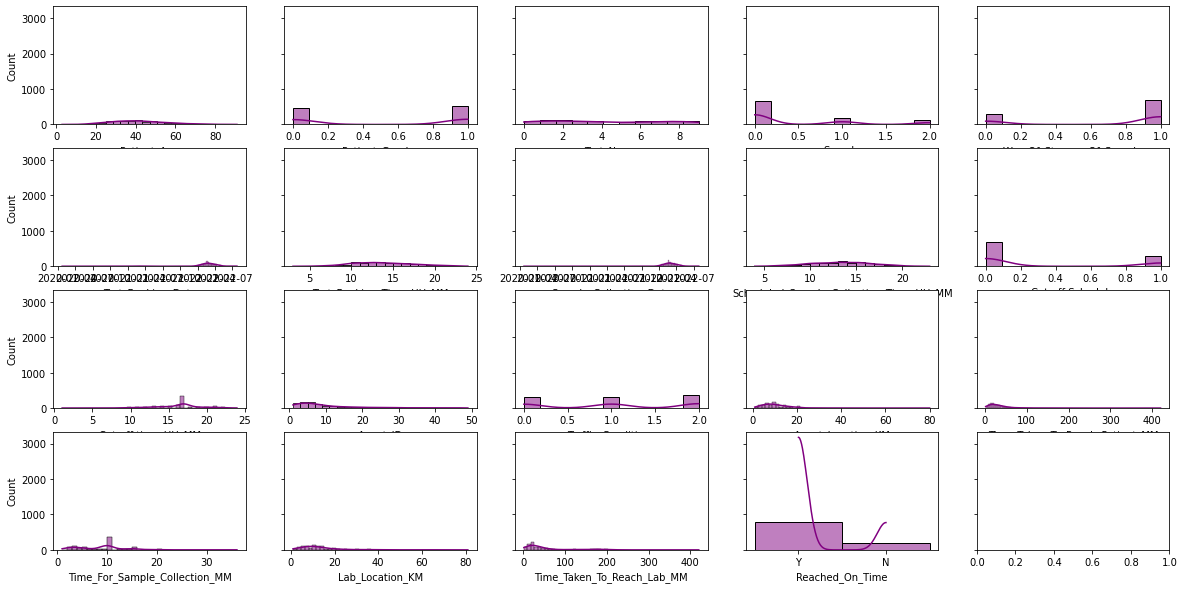

In [28]:
fig,axes=plt.subplots(4,5,figsize=(20,10),sharey=True)
for i in enumerate(data.columns):
    plt.subplot(4,5,i[0]+1)
    sns.histplot(data,x=i[1],color="purple",kde=True)

# Finding Co-Relation Between Features

<AxesSubplot:>

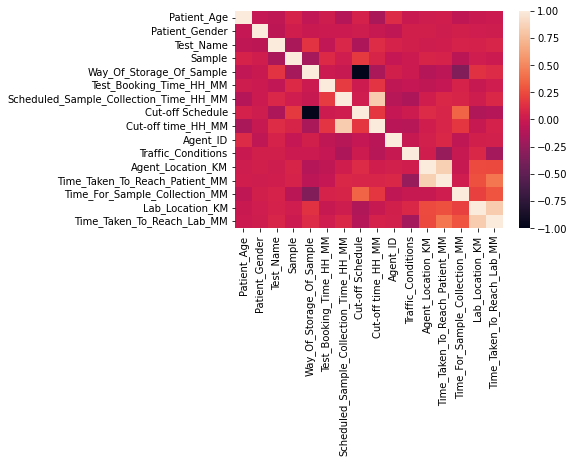

In [29]:
corr=data.iloc[:,:-1].corr(method="pearson")

sns.heatmap(corr)

# Exploratory Data Analysis

In [30]:
data.mean()

C:\Users\Akash Jadhav\AppData\Local\Temp\ipykernel_12832\531903386.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.mean()
C:\Users\Akash Jadhav\AppData\Local\Temp\ipykernel_12832\531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


Patient_Age                               41.467611
Patient_Gender                             0.517206
Test_Name                                  4.277328
Sample                                     0.446356
Way_Of_Storage_Of_Sample                   0.701417
Test_Booking_Time_HH_MM                   13.784889
Scheduled_Sample_Collection_Time_HH_MM    13.324089
Cut-off Schedule                           0.298583
Cut-off time_HH_MM                        16.248300
Agent_ID                                  10.778340
Traffic_Conditions                         1.044534
Agent_Location_KM                         11.076518
Time_Taken_To_Reach_Patient_MM            34.654858
Time_For_Sample_Collection_MM              8.876518
Lab_Location_KM                           14.830870
Time_Taken_To_Reach_Lab_MM                54.409919
dtype: float64

In [31]:
data.median()

C:\Users\Akash Jadhav\AppData\Local\Temp\ipykernel_12832\4184645713.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.median()
C:\Users\Akash Jadhav\AppData\Local\Temp\ipykernel_12832\4184645713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


Patient_Age                               40.0
Patient_Gender                             1.0
Test_Name                                  4.0
Sample                                     0.0
Way_Of_Storage_Of_Sample                   1.0
Test_Booking_Time_HH_MM                   13.3
Scheduled_Sample_Collection_Time_HH_MM    13.0
Cut-off Schedule                           0.0
Cut-off time_HH_MM                        17.0
Agent_ID                                   7.0
Traffic_Conditions                         1.0
Agent_Location_KM                         10.0
Time_Taken_To_Reach_Patient_MM            26.0
Time_For_Sample_Collection_MM             10.0
Lab_Location_KM                           11.0
Time_Taken_To_Reach_Lab_MM                29.0
dtype: float64

In [32]:
data.skew()

C:\Users\Akash Jadhav\AppData\Local\Temp\ipykernel_12832\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


Patient_Age                               0.540526
Patient_Gender                           -0.068971
Test_Name                                 0.129213
Sample                                    1.266851
Way_Of_Storage_Of_Sample                 -0.881588
Test_Booking_Time_HH_MM                   0.298111
Scheduled_Sample_Collection_Time_HH_MM   -0.050231
Cut-off Schedule                          0.881588
Cut-off time_HH_MM                       -0.435651
Agent_ID                                  1.681203
Traffic_Conditions                       -0.082546
Agent_Location_KM                         3.459279
Time_Taken_To_Reach_Patient_MM            5.431765
Time_For_Sample_Collection_MM             1.163699
Lab_Location_KM                           2.269456
Time_Taken_To_Reach_Lab_MM                1.960525
dtype: float64

In [33]:
data.kurt()

C:\Users\Akash Jadhav\AppData\Local\Temp\ipykernel_12832\2907027414.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurt()


Patient_Age                                0.243964
Patient_Gender                            -1.999294
Test_Name                                 -1.327109
Sample                                     0.131641
Way_Of_Storage_Of_Sample                  -1.225287
Test_Booking_Time_HH_MM                   -0.342318
Scheduled_Sample_Collection_Time_HH_MM    -0.433675
Cut-off Schedule                          -1.225287
Cut-off time_HH_MM                         0.824768
Agent_ID                                   2.317520
Traffic_Conditions                        -1.513603
Agent_Location_KM                         20.429796
Time_Taken_To_Reach_Patient_MM            44.733292
Time_For_Sample_Collection_MM              3.263953
Lab_Location_KM                            5.525075
Time_Taken_To_Reach_Lab_MM                 4.291805
dtype: float64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 1018
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Patient_Age                             988 non-null    int64         
 1   Patient_Gender                          988 non-null    int32         
 2   Test_Name                               988 non-null    int32         
 3   Sample                                  988 non-null    int32         
 4   Way_Of_Storage_Of_Sample                988 non-null    int32         
 5   Test_Booking_Date                       988 non-null    datetime64[ns]
 6   Test_Booking_Time_HH_MM                 988 non-null    float64       
 7   Sample_Collection_Date                  988 non-null    datetime64[ns]
 8   Scheduled_Sample_Collection_Time_HH_MM  988 non-null    float64       
 9   Cut-off Schedule                        988 non-null 

In [35]:
data.drop(["Test_Booking_Date","Sample_Collection_Date"],axis=1,inplace=True)

In [36]:
data.drop(["Agent_ID"],axis=1,inplace=True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 1018
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Patient_Age                             988 non-null    int64  
 1   Patient_Gender                          988 non-null    int32  
 2   Test_Name                               988 non-null    int32  
 3   Sample                                  988 non-null    int32  
 4   Way_Of_Storage_Of_Sample                988 non-null    int32  
 5   Test_Booking_Time_HH_MM                 988 non-null    float64
 6   Scheduled_Sample_Collection_Time_HH_MM  988 non-null    float64
 7   Cut-off Schedule                        988 non-null    int32  
 8   Cut-off time_HH_MM                      988 non-null    float64
 9   Traffic_Conditions                      988 non-null    int32  
 10  Agent_Location_KM                       988 non-null    float

In [38]:
data

,Patient_Age,Patient_Gender,Test_Name,Sample,Way_Of_Storage_Of_Sample,Test_Booking_Time_HH_MM,Scheduled_Sample_Collection_Time_HH_MM,Cut-off Schedule,Cut-off time_HH_MM,Traffic_Conditions,Agent_Location_KM,Time_Taken_To_Reach_Patient_MM,Time_For_Sample_Collection_MM,Lab_Location_KM,Time_Taken_To_Reach_Lab_MM,Reached_On_Time
0,34,1,0,0,0,12.40,13.00,1,17.00,1,7.0,14,10,13.0,26,Y
1,25,1,5,0,1,11.12,14.13,0,17.13,1,12.0,24,10,6.0,12,Y
2,29,0,9,0,1,12.24,16.10,0,19.10,2,2.0,6,3,3.0,9,Y
3,28,1,8,0,1,13.38,14.00,0,17.00,1,5.0,10,10,5.0,10,Y
4,32,1,6,0,1,16.10,10.15,0,13.15,0,12.0,72,3,9.0,54,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,30,1,9,0,1,10.00,12.00,0,15.00,0,9.0,36,3,38.9,195,N
1015,18,0,9,0,1,18.00,9.00,0,12.00,0,5.0,20,9,35.4,177,N
1016,18,0,9,0,1,11.00,13.00,0,16.00,2,3.0,7,11,59.7,178,N
1017,37,1,9,0,1,14.00,16.00,0,19.00,2,5.0,12,10,63.0,173,N


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 1018
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Patient_Age                             988 non-null    int64  
 1   Patient_Gender                          988 non-null    int32  
 2   Test_Name                               988 non-null    int32  
 3   Sample                                  988 non-null    int32  
 4   Way_Of_Storage_Of_Sample                988 non-null    int32  
 5   Test_Booking_Time_HH_MM                 988 non-null    float64
 6   Scheduled_Sample_Collection_Time_HH_MM  988 non-null    float64
 7   Cut-off Schedule                        988 non-null    int32  
 8   Cut-off time_HH_MM                      988 non-null    float64
 9   Traffic_Conditions                      988 non-null    int32  
 10  Agent_Location_KM                       988 non-null    float

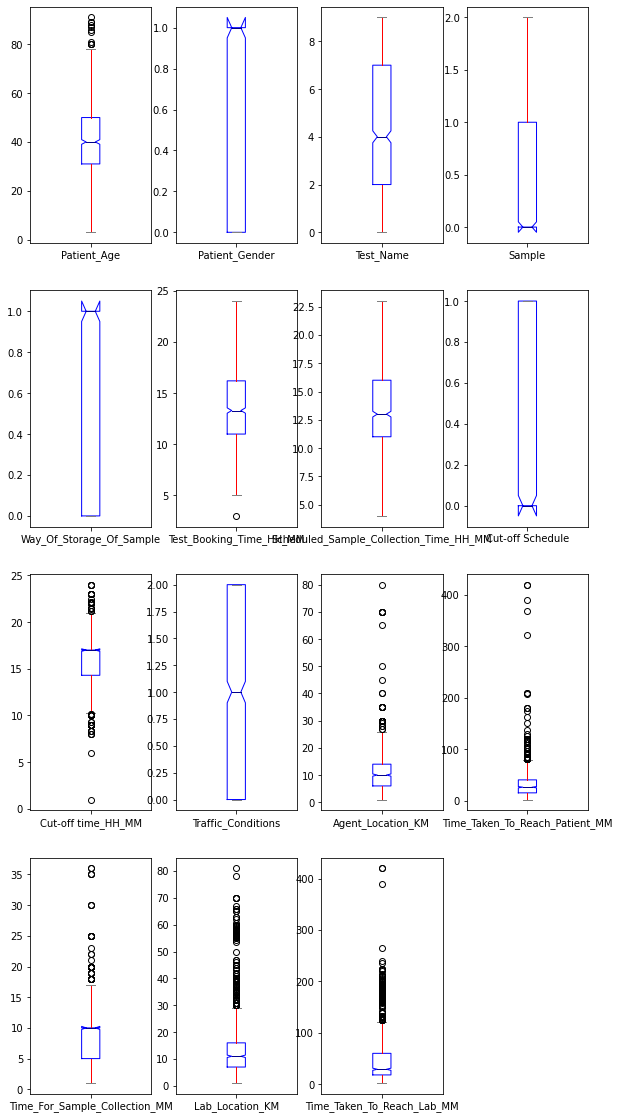

In [40]:
color = dict(boxes='blue', whiskers='red',medians='DarkBlue', caps='Gray')
plt.figure(figsize=(15,15))
for i in enumerate(data.iloc[:,:-1].columns):
    plt.subplot(4,4,i[0]+1)
    data[i[1]].plot(kind="box",color=color,figsize=(10,20),notch=True)

In [41]:
data.columns

Index(['Patient_Age', 'Patient_Gender', 'Test_Name', 'Sample',
       'Way_Of_Storage_Of_Sample', 'Test_Booking_Time_HH_MM',
       'Scheduled_Sample_Collection_Time_HH_MM', 'Cut-off Schedule',
       'Cut-off time_HH_MM', 'Traffic_Conditions', 'Agent_Location_KM',
       'Time_Taken_To_Reach_Patient_MM', 'Time_For_Sample_Collection_MM',
       'Lab_Location_KM', 'Time_Taken_To_Reach_Lab_MM', 'Reached_On_Time'],
      dtype='object')

In [42]:
outlier_data=["Patient_Age","Sample","Cut-off time_HH_MM","Agent_Location_KM","Time_Taken_To_Reach_Patient_MM","Time_For_Sample_Collection_MM","Lab_Location_KM","Time_Taken_To_Reach_Lab_MM"]

In [43]:
from scipy.stats.mstats import winsorize

In [44]:
for i in outlier_data:
    winsorize(data[i],limits=[0.15,0.15],inplace=True)

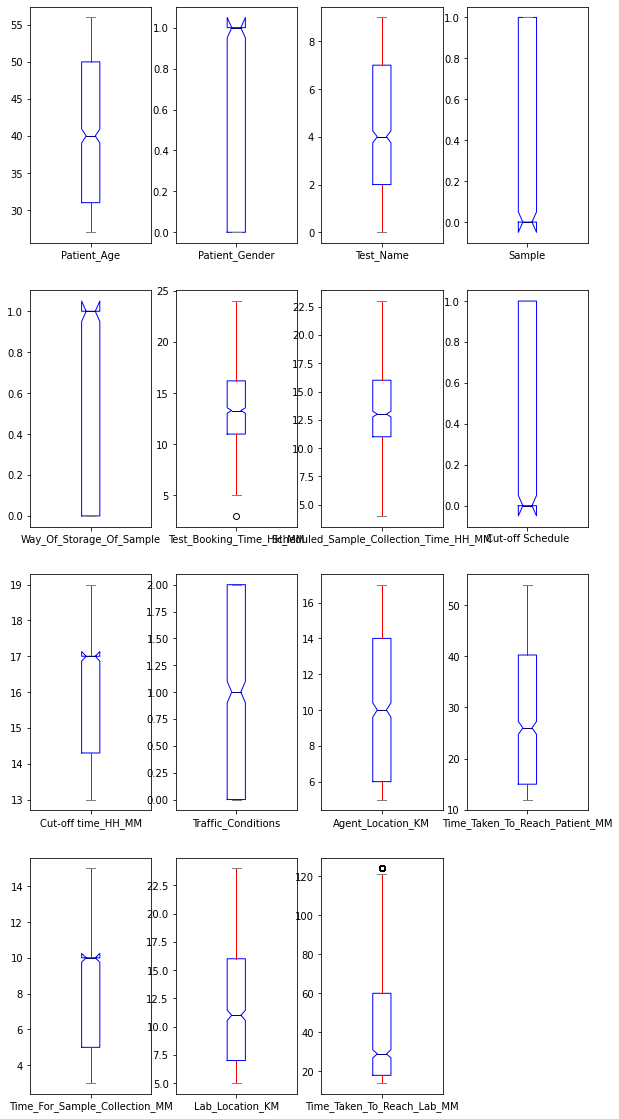

In [45]:
color = dict(boxes='blue', whiskers='red',medians='DarkBlue', caps='Gray')
plt.figure(figsize=(15,15))
for i in enumerate(data.iloc[:,:-1].columns):
    plt.subplot(4,4,i[0]+1)
    data[i[1]].plot(kind="box",color=color,figsize=(10,20),notch=True)

In [46]:
X=data.iloc[:,:-1]

In [47]:
X

,Patient_Age,Patient_Gender,Test_Name,Sample,Way_Of_Storage_Of_Sample,Test_Booking_Time_HH_MM,Scheduled_Sample_Collection_Time_HH_MM,Cut-off Schedule,Cut-off time_HH_MM,Traffic_Conditions,Agent_Location_KM,Time_Taken_To_Reach_Patient_MM,Time_For_Sample_Collection_MM,Lab_Location_KM,Time_Taken_To_Reach_Lab_MM
0,34,1,0,0,0,12.40,13.00,1,17.00,1,7.0,14,10,13.0,26
1,27,1,5,0,1,11.12,14.13,0,17.13,1,12.0,24,10,6.0,14
2,29,0,9,0,1,12.24,16.10,0,19.00,2,5.0,12,3,5.0,14
3,28,1,8,0,1,13.38,14.00,0,17.00,1,5.0,12,10,5.0,14
4,32,1,6,0,1,16.10,10.15,0,13.15,0,12.0,54,3,9.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,30,1,9,0,1,10.00,12.00,0,15.00,0,9.0,36,3,24.0,124
1015,27,0,9,0,1,18.00,9.00,0,13.00,0,5.0,20,9,24.0,124
1016,27,0,9,0,1,11.00,13.00,0,16.00,2,5.0,12,11,24.0,124
1017,37,1,9,0,1,14.00,16.00,0,19.00,2,5.0,12,10,24.0,124


<AxesSubplot:>

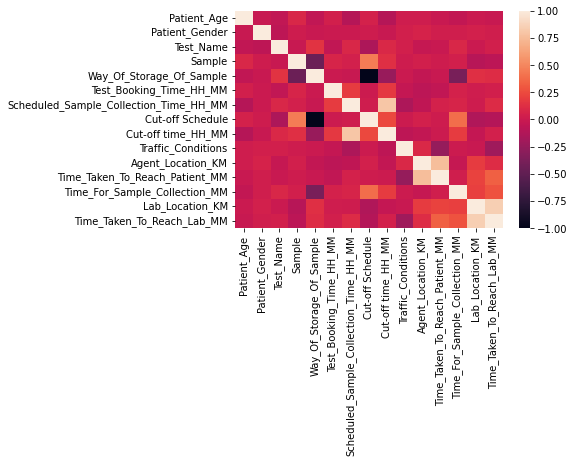

In [48]:
corr=X.iloc[:,:].corr(method="pearson")

sns.heatmap(corr)

In [49]:
X.columns

Index(['Patient_Age', 'Patient_Gender', 'Test_Name', 'Sample',
       'Way_Of_Storage_Of_Sample', 'Test_Booking_Time_HH_MM',
       'Scheduled_Sample_Collection_Time_HH_MM', 'Cut-off Schedule',
       'Cut-off time_HH_MM', 'Traffic_Conditions', 'Agent_Location_KM',
       'Time_Taken_To_Reach_Patient_MM', 'Time_For_Sample_Collection_MM',
       'Lab_Location_KM', 'Time_Taken_To_Reach_Lab_MM'],
      dtype='object')

In [50]:
X.drop(["Agent_Location_KM","Lab_Location_KM","Scheduled_Sample_Collection_Time_HH_MM"],axis=1,inplace=True)

In [51]:
X

,Patient_Age,Patient_Gender,Test_Name,Sample,Way_Of_Storage_Of_Sample,Test_Booking_Time_HH_MM,Cut-off Schedule,Cut-off time_HH_MM,Traffic_Conditions,Time_Taken_To_Reach_Patient_MM,Time_For_Sample_Collection_MM,Time_Taken_To_Reach_Lab_MM
0,34,1,0,0,0,12.40,1,17.00,1,14,10,26
1,27,1,5,0,1,11.12,0,17.13,1,24,10,14
2,29,0,9,0,1,12.24,0,19.00,2,12,3,14
3,28,1,8,0,1,13.38,0,17.00,1,12,10,14
4,32,1,6,0,1,16.10,0,13.15,0,54,3,54
...,...,...,...,...,...,...,...,...,...,...,...,...
1014,30,1,9,0,1,10.00,0,15.00,0,36,3,124
1015,27,0,9,0,1,18.00,0,13.00,0,20,9,124
1016,27,0,9,0,1,11.00,0,16.00,2,12,11,124
1017,37,1,9,0,1,14.00,0,19.00,2,12,10,124


In [52]:
X.columns


Index(['Patient_Age', 'Patient_Gender', 'Test_Name', 'Sample',
       'Way_Of_Storage_Of_Sample', 'Test_Booking_Time_HH_MM',
       'Cut-off Schedule', 'Cut-off time_HH_MM', 'Traffic_Conditions',
       'Time_Taken_To_Reach_Patient_MM', 'Time_For_Sample_Collection_MM',
       'Time_Taken_To_Reach_Lab_MM'],
      dtype='object')

In [53]:
X.Sample.value_counts()

0    673
1    315
Name: Sample, dtype: int64

In [54]:
Y=data["Reached_On_Time"]

In [55]:
Y

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1014    N
1015    N
1016    N
1017    N
1018    N
Name: Reached_On_Time, Length: 988, dtype: object

In [56]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report

In [57]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,random_state=0)

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
model=LogisticRegression()

In [60]:
model.fit(Xtrain,Ytrain)

C:\Users\Akash Jadhav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
model.score(Xtest,Ytest)

0.9878542510121457

In [62]:
Ytest[:20]

374     Y
456     Y
27      N
464     Y
747     Y
1001    N
805     Y
551     Y
476     Y
846     Y
788     Y
593     Y
672     Y
280     N
295     Y
14      Y
938     N
644     Y
432     Y
322     Y
Name: Reached_On_Time, dtype: object

In [69]:
pred=model.predict(Xtest[:1])

In [71]:
print(str(pred[0]))

Y


In [274]:
#pred=model.predict([])

In [275]:
confusion_matrix(Ytest,pred)

array([[ 47,   2],
       [  1, 197]], dtype=int64)

In [276]:
print(classification_report(Ytest,pred))

              precision    recall  f1-score   support

           N       0.98      0.96      0.97        49
           Y       0.99      0.99      0.99       198

    accuracy                           0.99       247
   macro avg       0.98      0.98      0.98       247
weighted avg       0.99      0.99      0.99       247



In [277]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [262]:
stacking_model=StackingClassifier(estimators=[("Decision tree",DecisionTreeClassifier(max_depth=5)),("KNN",KNeighborsClassifier(n_neighbors=5)),("SVM",SVC(gamma = 0.001, probability = True))],
                                  final_estimator=LogisticRegression(),
                                  cv=3,
                                  stack_method='auto')

In [263]:
stacking_model.fit(Xtrain,Ytrain)

StackingClassifier(cv=3,
                   estimators=[('Decision tree',
                                DecisionTreeClassifier(max_depth=5)),
                               ('KNN', KNeighborsClassifier()),
                               ('SVM', SVC(gamma=0.001, probability=True))],
                   final_estimator=LogisticRegression())

In [264]:
stacking_model.score(Xtest,Ytest)

0.9878542510121457

In [265]:
stack_scores=cross_val_score(stacking_model,X,Y,cv=10)

In [266]:
stack_scores

array([0.94949495, 0.93939394, 0.92929293, 0.91919192, 0.96969697,
       1.        , 1.        , 1.        , 1.        , 0.98979592])

In [267]:
stack_scores.mean()

0.9696866625438055

In [268]:
confusion_matrix(Ytest,stacking_model.predict(Xtest))

array([[ 46,   3],
       [  0, 198]], dtype=int64)

In [269]:
print(classification_report(Ytest,stacking_model.predict(Xtest)))

              precision    recall  f1-score   support

           N       1.00      0.94      0.97        49
           Y       0.99      1.00      0.99       198

    accuracy                           0.99       247
   macro avg       0.99      0.97      0.98       247
weighted avg       0.99      0.99      0.99       247



In [278]:
import pickle
# open a file, where you ant to store the data
file = open('prediction_model.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)